### KNN ...k NEAREST NEIGHBOR ...THIS IIS A SUPERVISED MODEL ###
## TRAINING THE DATA ##
1. STORE ALL THE DATA
## PREDICTION ALOGARITHM ##
1. cALCULATE THE DISTANCE FROM X TO ALL POINTS IN THE DATA.
2. sort the points in your data by increasing distance 
3. Predict the majority label of the k closest points

Choosing a K will affect whaty class a new point is assigned to.
PROS...it is very simple, Training is trivial, , easy to add more data points, few parameters(K, Distance metric) , works with any no of classes.
CONS....High prediction cost(worse for large data sets), not good with high dimensional data, does not work well with categorical data.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("Desktop/python/ClassifiedData-230531-084835.csv", index_col = 0)

In [7]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
#it is import to standardize the variables first because knn classifier predicts the class of a given test observation by indentifying the
#observations nearest to it.The scale of the variable really matters as large scale values  will have a bigger effect on the diiastance between the 
#observations hence affecting the KNN classifier.
from sklearn.preprocessing import StandardScaler

In [9]:
#creating an instance of the std scaler
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop("TARGET CLASS", axis = 1))

StandardScaler()

In [17]:
#next we ned to use this scaler to fit our x variables except the target class as shown above and because we have created a scaler, then we can go
# ahead and do data transformation(here the data is standardized (centered and scaled)...therefore creating an array of the scaled features.)
scaled_features = scaler.transform(df.drop("TARGET CLASS", axis = 1))

In [18]:
#we the want to create a data frame from this
df_feat =  pd.DataFrame (scaled_features, columns = df.columns[:-1] )
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [19]:
#data has been put on a std scale...the next step is to train the data
from sklearn.model_selection import train_test_split

In [21]:
X = df_feat #you can also use the scaled_features
y = df["TARGET CLASS"]

In [23]:
#train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)#....instanciate knn

In [27]:
#fitting training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
prediction = knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(confusion_matrix(y_test, prediction))
print("\n")
print(classification_report(y_test, prediction))

[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [36]:
#It is often difficult to choose a good k hence we use the elbow method to choose a good k.
#first lets have an open /empty list.
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)#fitting our model
    prediction_i = knn.predict(X_test)#here a prediction is being made.
    error_rate.append (np.mean(prediction_i != y_test))#appending errors

In [37]:
error_rate 

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

Text(0, 0.5, 'Error rate')

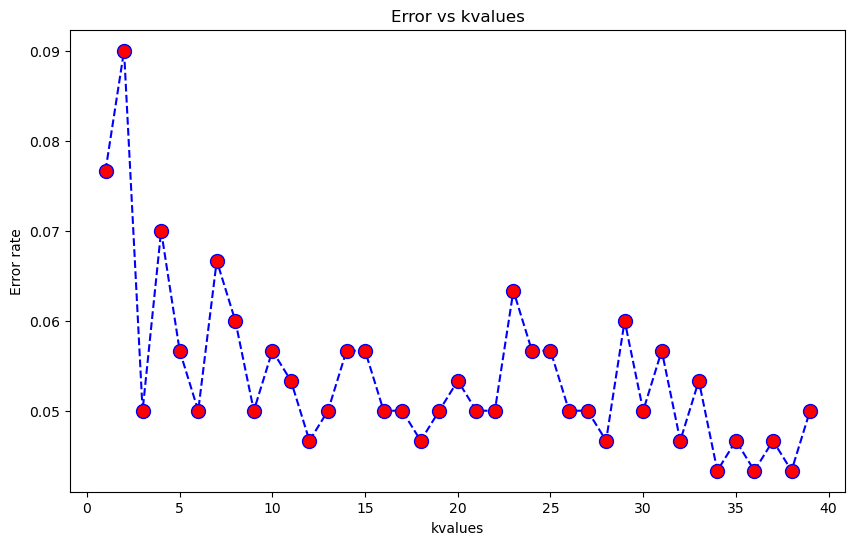

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error_rate, color="blue", ls="dashed", marker = "o", markerfacecolor="red", markersize = 10)
plt.title("Error vs kvalues")
plt.xlabel("kvalues")
plt.ylabel("Error rate")

In [50]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print("K=1")
print("\n")
print(confusion_matrix(y_test, prediction))
print("\n")
print(classification_report(y_test, prediction))



K=1


[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [51]:
#usinhg k=23 where we have noticed data begins to flactuate
knn = KNeighborsClassifier(n_neighbors = 23)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

print("K=23")
print("\n")
print(confusion_matrix(y_test, prediction))
print("\n")
print(classification_report(y_test, prediction))



K=23


[[150   9]
 [ 10 131]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       159
           1       0.94      0.93      0.93       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [52]:
knn = KNeighborsClassifier(n_neighbors = 17)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

print("K=17")
print("\n")
print(confusion_matrix(y_test, prediction))
print("\n")
print(classification_report(y_test, prediction))


K=17


[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [53]:
knn = KNeighborsClassifier(n_neighbors = 12)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

print("K=12")
print("\n")
print(confusion_matrix(y_test, prediction))
print("\n")
print(classification_report(y_test, prediction))


K=12


[[155   4]
 [ 10 131]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       159
           1       0.97      0.93      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
##use knn model data